In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("liujiaqi/hr-comma-sepcsv")

print("Path to dataset files:", path)

100%|██████████| 111k/111k [00:00<00:00, 46.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/liujiaqi/hr-comma-sepcsv/versions/1


In [3]:
%cd /content/drive/My Drive/FORTRAY/course_end_project


/content/drive/My Drive/FORTRAY/course_end_project


In [7]:
%cp  /root/.cache/kagglehub/datasets/liujiaqi/hr-comma-sepcsv/versions/1/HR_comma_sep.csv .
%ls

Employee_turnover_analytics.ipynb  hr-comma-sepcsv/  HR_comma_sep.csv



# **Task 1: Perform data quality checks by checking for missing values, if any**







In [4]:
filename = 'HR_comma_sep.csv'
df = pd.read_csv(filename)
print(f"Loaded file {filename} with number of records = {df.shape}")

Loaded file HR_comma_sep.csv with number of records = (14999, 10)


In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Task 1.1: Perform data quality checks by checking for missing values, if any.

In [10]:
# check for null columns
empty_columns = df.isnull().sum()
print(f"Empty columns: \n {empty_columns}")

Empty columns: 
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [5]:
# Encode categorial columns sales and salary
df_encoded = pd.get_dummies(df, columns=['sales','salary'], drop_first=True)
df_encoded.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_RandD            14999 non-null  bool   
 9   sales_accounting       14999 non-null  bool   
 10  sales_hr               14999 non-null  bool   
 11  sales_management       14999 non-null  bool   
 12  sales_marketing        14999 non-null  bool   
 13  sales_product_mng      14999 non-null  bool   
 14  sales_sales            14999 non-null  bool   
 15  sa

In [12]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [13]:
numerical_columns = df_encoded.select_dtypes(include = ['int64','float64']).columns
numerical_columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

# **Task 2: Understanding Factors Contributing to Employee Turnover (EDA)**

## Task 2.1 : Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

**Correlation Analysis**

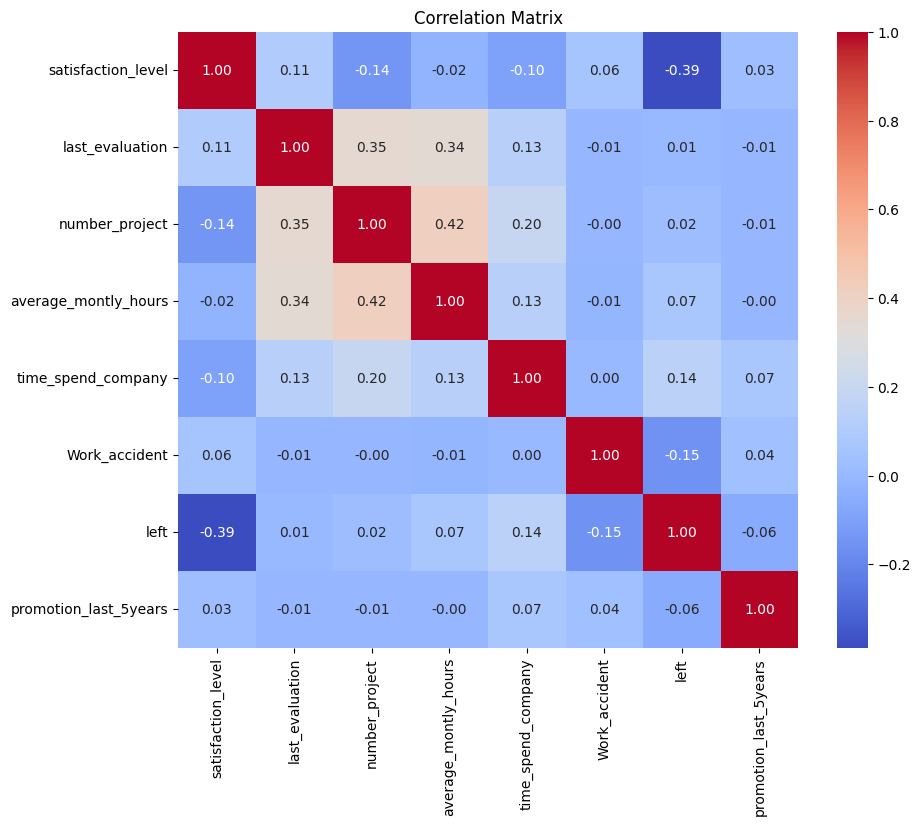

In [14]:
corr_matrix = df_encoded[numerical_columns].corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

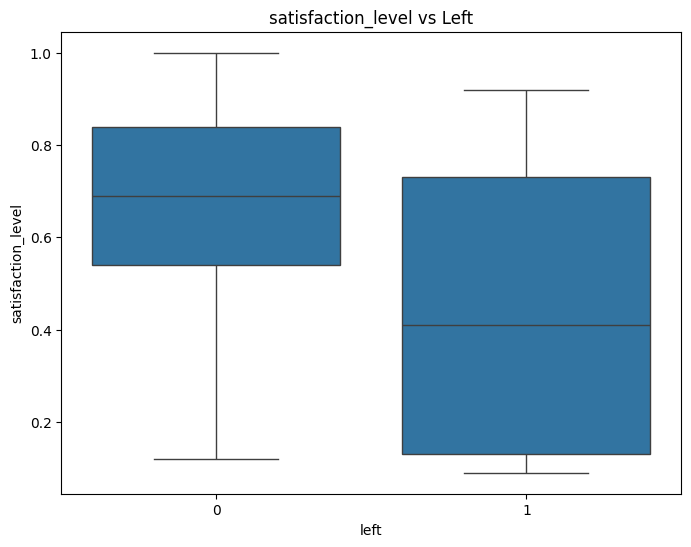

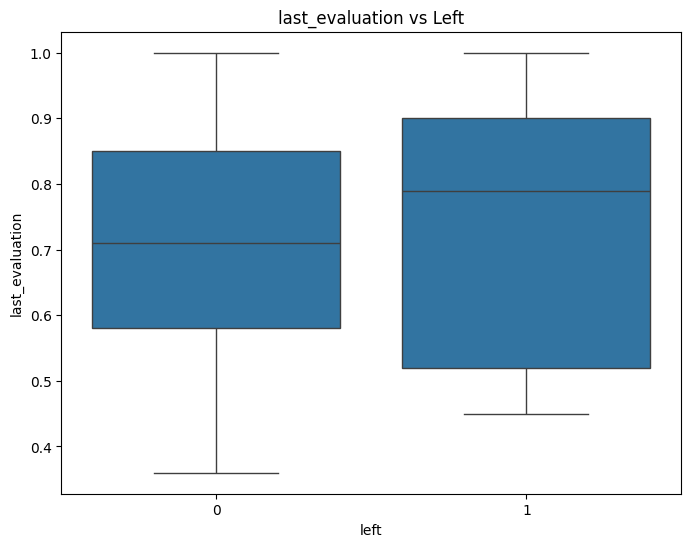

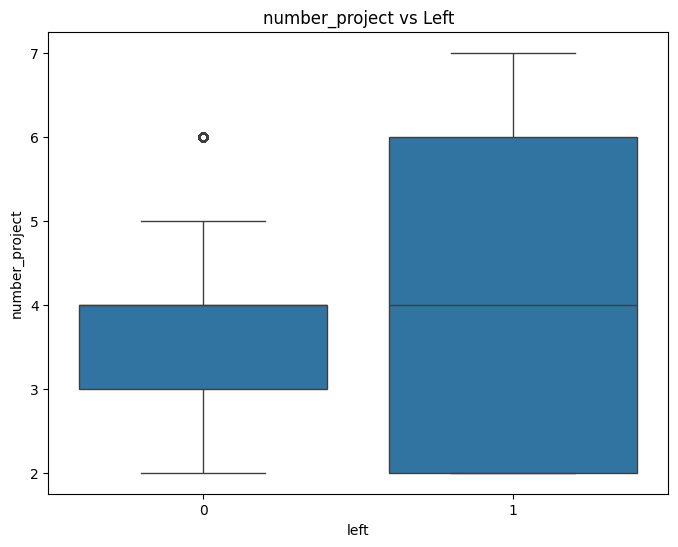

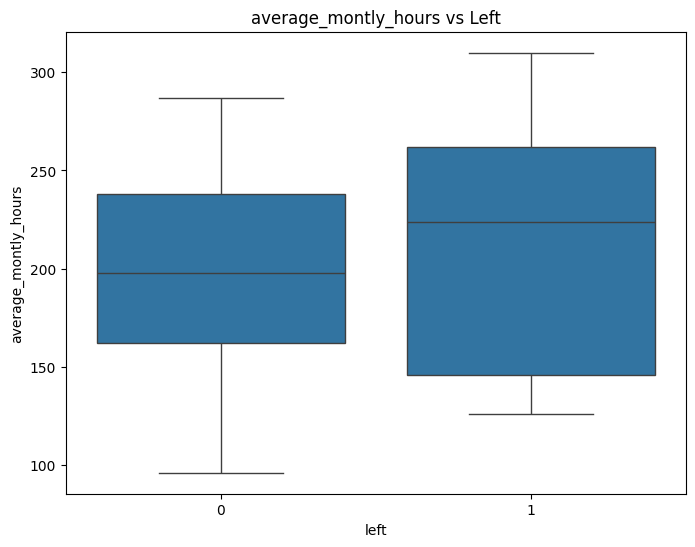

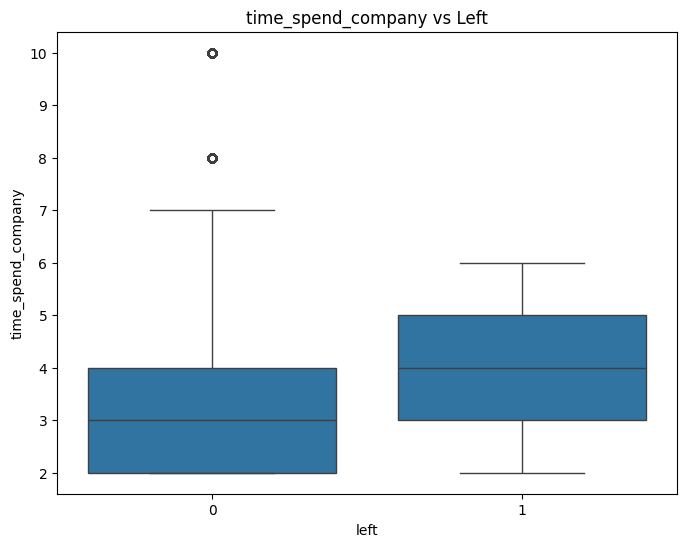

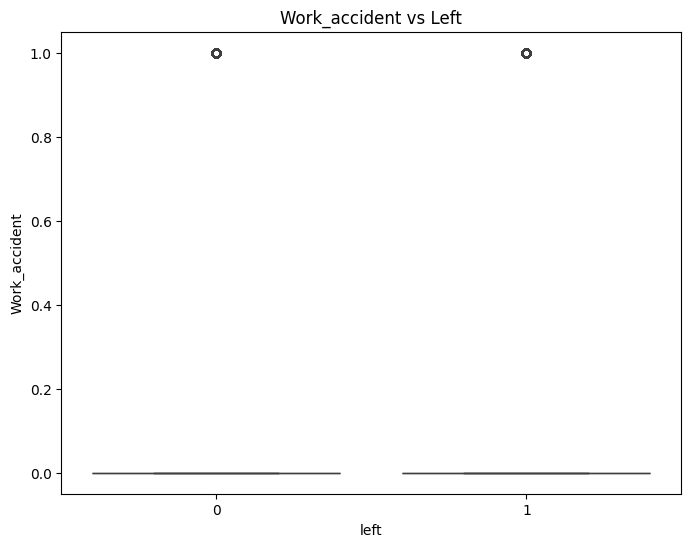

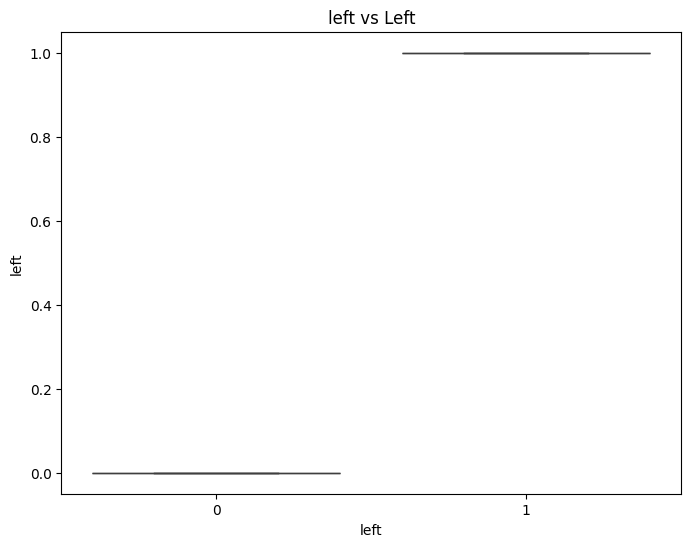

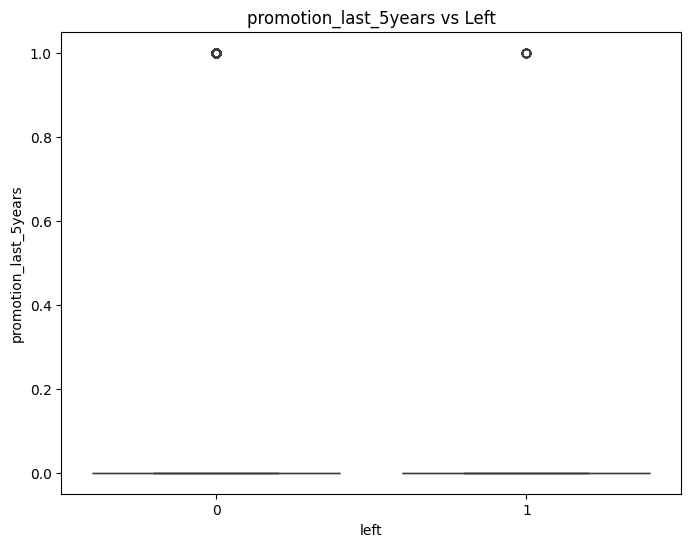

In [15]:
for colm in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='left', y=colm, data=df)
  plt.title(f'{colm} vs Left')
  plt.show()

In [16]:
df_encoded[df_encoded['left']==1]['promotion_last_5years'].value_counts()

,count
promotion_last_5years,
0,3552
1,19


## Task 2.2 Draw the distribution plot

Distribution plot of


1.   Employee Satisfaction (use column satisfaction_level)
2.   Employee Evaluation (use column last_evaluation)
3.   Employee Average Monthly Hours (use column average_montly_hours)


In [17]:
def plot_distribution(df, feature_map):
  for feature_name, label in feature_map.items():
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature_name], kde=True, color='blue')
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.show()



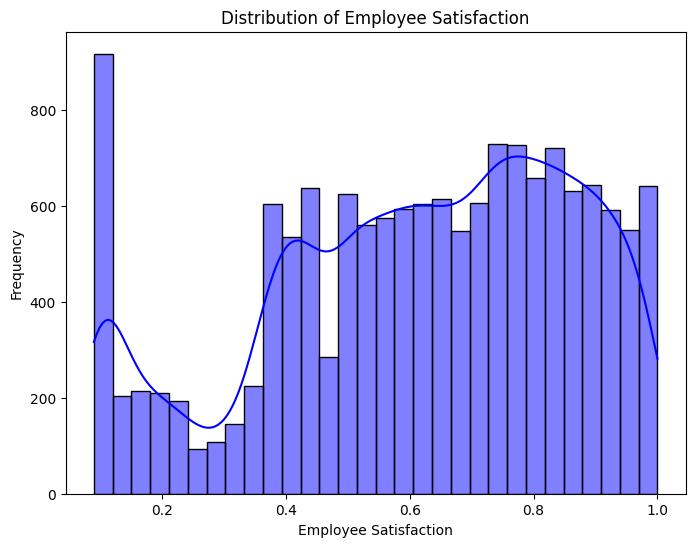

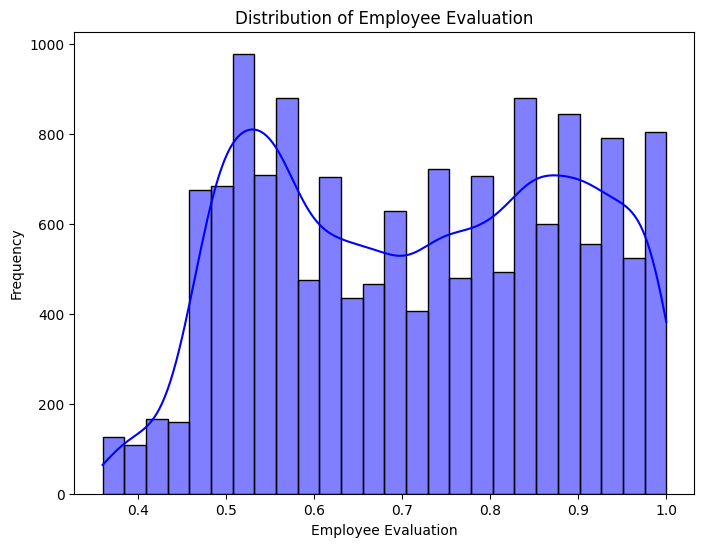

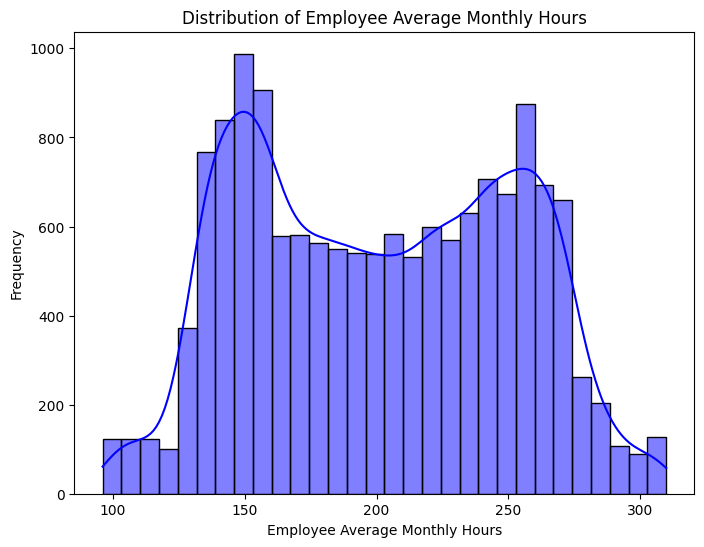

In [18]:
feature_map = {
    'satisfaction_level': 'Employee Satisfaction',
    'last_evaluation': 'Employee Evaluation',
    'average_montly_hours': 'Employee Average Monthly Hours'

}
plot_distribution(df_encoded,feature_map )


## Task 2.3 Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

In [19]:
df_encoded['number_project'].value_counts()

,count
number_project,
4,4365
3,4055
5,2761
2,2388
6,1174
7,256


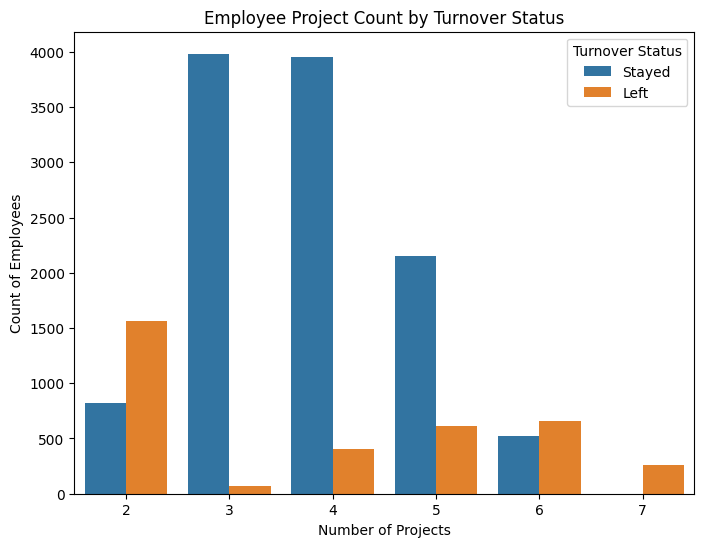

In [20]:
# bar plot of the employee project count of both employees who left and stayed in the organization
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df_encoded)

plt.title('Employee Project Count by Turnover Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')
plt.legend(title='Turnover Status', labels=['Stayed', 'Left'])

plt.show()


# Insights from above bar plot:

The bar chart shows that the majority of employees who stayed in the organization have 3 to 5 projects, with the highest counts around 4 (approximately 4000 employees).  The highest counts of projects for employees who left the organization is 2 projects (around 1500 employees) and a noticeable number between 5 to 7 projects. So this feature  doesn't provide a clear overall predictor of turnover since many who left had fewer projects. But it suggests that a higher project load (5-7) may contribute to employee turnover, as this range is more prevalent among those who left compared to those who stayed.

# Task 3: Perform clustering of employees who left based on their satisfaction and evaluation.


*   Choose columns satisfaction_level, last_evaluation, and left..
*   Verify K-means clustering of employees who left the company into 3
clusters?
*   Based on the satisfaction and evaluation factors, give your thoughts
on the employee clusters.






## Task 3.1 Choose columns satisfaction_level, last_evaluation, and left.

In [6]:
left_employees = df_encoded[df_encoded['left'] == 1].copy()
print(f"Total number of employees left {len(left_employees)}")
# Select columns satisfaction_level, last_evaluation
X = left_employees[['satisfaction_level','last_evaluation']]
X.describe().T

Total number of employees left 3571


,count,mean,std,min,25%,50%,75%,max
satisfaction_level,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92
last_evaluation,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.00


In [ ]:
# As the above data is already in the 0 to 1 range, scaling is not necessary

## Do K-means clustering of employees who left the company into 3 clusters?

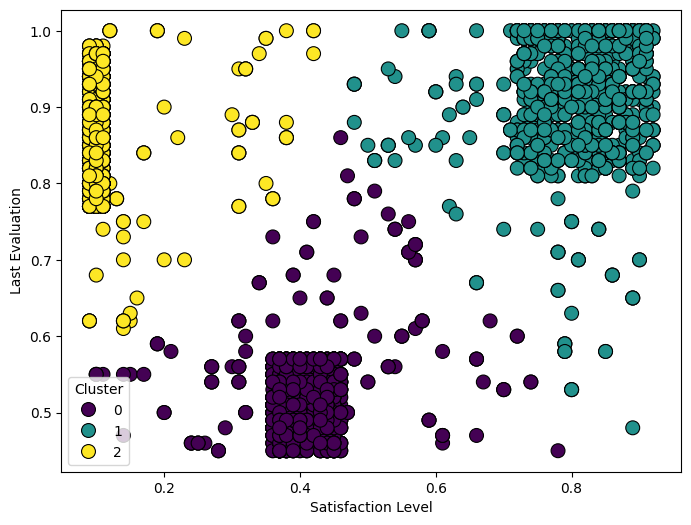

Cluster Centers:
[[0.41014545 0.51698182]
 [0.80851586 0.91170931]
 [0.11115466 0.86930085]]


In [7]:
k_means  = KMeans(n_clusters=3, random_state= 42)
clusters = k_means.fit_predict(X)

left_employees['cluster'] = clusters

# Plot cluster

plt.figure(figsize=(8,6))
sns.scatterplot(x=left_employees['satisfaction_level'] ,
                y= left_employees['last_evaluation'],
                hue=left_employees['cluster'],
                palette="viridis",
                s=100, edgecolor='k', marker='o')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

# Print cluster centers
print("Cluster Centers:")
print(k_means.cluster_centers_)

# Elbow method to find the optimal number of clusters

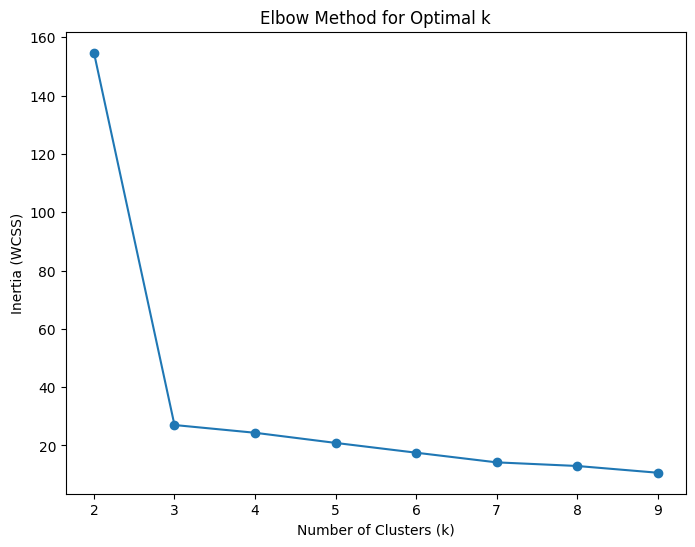

In [8]:
inertia = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, random_state=43)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.show()

The elbow appears to be at k=3, where the rate of decrease in inertia changes significantly. Therefore, the optimal number of clusters is 3.

## Task 3.3: Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

Cluster analysis:



1.   Cluster 0 (Yellow):
Concentrated at low satisfaction levels (0.0 to 0.2) and high last evaluation scores (0.8 to 1.0). This cluster include employees with strong performance, their dissatisfaction may drove them to leave the company. So this is a cluster represents a critical loss—high performers who were unhappy and needs immediate attention to reduce the dissatisfaction level.


2.   Cluster 1 (Purple): Centered at low satisfaction levels (0.3 to 0.5) and low last evaluation scores (0.4 to 0.6).Employees in this cluster were both dissatisfied and underperforming based on their last evaluation. It might be beneficial to perform a survey/study on these employees to identify the reason for dissatisfaction and lower performance.

3. Cluster 3 (Green): High satisfaction levels (0.6 to 1.0) and a wide range of last evaluation scores (0.4 to 1.0), with a dense concentration around 0.8 to 1.0 for both satisfaction and evaluation.Employees in this cluster were generally satisfied and often had high evaluation scores, yet they still left.This group likely left for external opportunities (e.g., better pay, career advancement) rather than internal dissatisfaction.This cluster highlights a retention challenge for high-performing, satisfied employees. The company should focus on competitive compensation, career development, and long-term incentives to retain such talent.



# Task 4: Handle the left Class Imbalance using the SMOTE technique

## Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [9]:
X = df_encoded.drop(columns={'left'})
y = df_encoded['left']

print(f"Feature (X) Shape = {X.shape} , columns : {X.columns}")
print(f"Target (y) Shape = {y.shape} ")

# Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123, stratify=y)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"Original class distribution in y_train: \n{y_train.value_counts()}")

# Convert to dataframe
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

Feature (X) Shape = (14999, 18) , columns : Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_RandD', 'sales_accounting', 'sales_hr',
       'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_low',
       'salary_medium'],
      dtype='object')
Target (y) Shape = (14999,) 
Train set size: 11999
Test set size: 3000
Original class distribution in y_train: 
left
0    9142
1    2857
Name: count, dtype: int64


## Upsample the train dataset using the SMOTE technique from the imblearn module

In [10]:
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print(f"Resampled class distribution in y_train using SMOTE : \n{y_train_res.value_counts()}")

X_train_df = pd.DataFrame(X_train_res, columns=X_train.columns)
X_train_df.head(1)

Resampled class distribution in y_train using SMOTE : 
left
0    9142
1    9142
Name: count, dtype: int64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,-1.862862,-1.900843,0.9728,0.563659,0.344888,-0.411003,-0.148237,-0.236189,-0.231831,-0.226187,-0.208741,-0.247388,-0.254889,1.630066,-0.421065,-0.471981,1.021823,-0.872167


# Task 5: Perform 5-fold cross-validation model training and evaluate performance.

# 5.1 : Train a logistic regression model, apply a 5-fold CV, and plot the classification report

In [11]:
# 5 - fold CV
cv = KFold(5, random_state=123, shuffle=True)

In [12]:
def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]  # Extract relevant lines
    classes = []
    precision = []
    recall = []
    f1 = []
    for line in lines:
        if line.strip():
            row = line.split()
            classes.append(row[0])
            precision.append(float(row[1]))
            recall.append(float(row[2]))
            f1.append(float(row[3]))

    plt.figure(figsize=(10, 5))
    x = np.arange(len(classes))
    width = 0.2

    plt.bar(x - width, precision, width, label='Precision')
    plt.bar(x, recall, width, label='Recall')
    plt.bar(x + width, f1, width, label='F1-Score')
    plt.xlabel('Classes')
    plt.ylabel('Scores')
    plt.title(title)
    plt.xticks(x, classes)
    plt.legend()
    plt.tight_layout()
    plt.show()

Logistic Regression Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Coefficients: [[-1.14272348  0.2323573  -0.60470905  0.29136127  0.73921472 -0.62967159
  -0.21274243 -0.06786178  0.02755254  0.09666324 -0.05913015  0.03882093
   0.01823375  0.08387346  0.07079688  0.12287807  1.16084931  0.89882314]]
Logistic Regression Best Cross-Validation Score: 0.7785489026470621

Logistic Regression Classification Report on Train Data:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      9142
           1       0.76      0.81      0.79      9142

    accuracy                           0.78     18284
   macro avg       0.78      0.78      0.78     18284
weighted avg       0.78      0.78      0.78     18284


Logistic Regression Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       

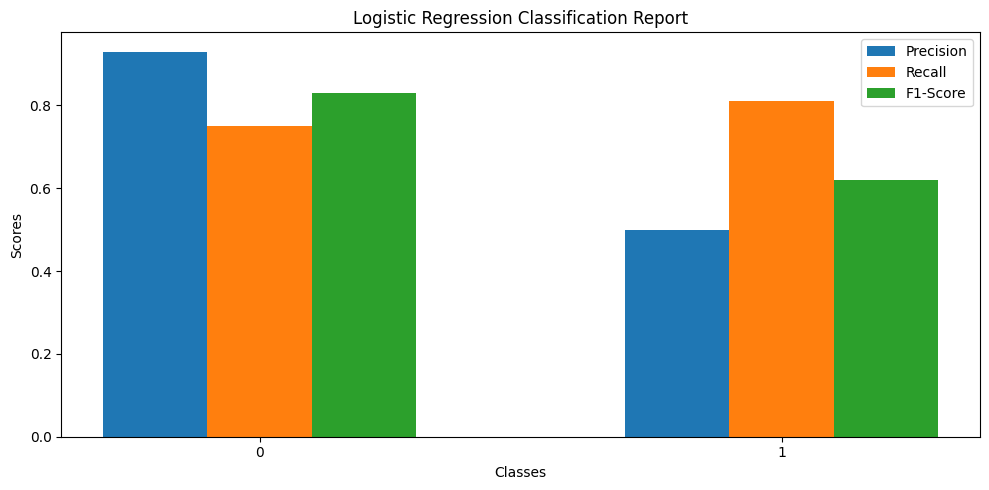

In [14]:
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 200, 300]
}

lr_grid_search_cv = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param_grid=lr_param_grid, cv=cv, scoring='accuracy')
lr_grid_search_cv.fit(X_train_df, y_train_res)

print("Logistic Regression Best Parameters:", lr_grid_search_cv.best_params_)
print("Logistic Regression Coefficients:", lr_grid_search_cv.best_estimator_.coef_)
print("Logistic Regression Best Cross-Validation Score:", lr_grid_search_cv.best_score_)
# Predictions on the train data
y_pred_lr_train = lr_grid_search_cv.predict(X_train_df)

# Print the classification report for train data
print("\nLogistic Regression Classification Report on Train Data:")
print(classification_report(y_train_res, y_pred_lr_train))

y_pred_lr = lr_grid_search_cv.predict(X_test_df)
print("\nLogistic Regression Classification Report on Test Data:")
cls_report = classification_report(y_test, y_pred_lr)
print(cls_report)
plot_classification_report(cls_report, 'Logistic Regression Classification Report')

# Task 5.2: Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.

RandomForestClassifier Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier Best Cross-Validation Score: 0.9884598883828801

RandomForestClassifier Classification Report on Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284


RandomForestClassifier Classification Report on Test data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



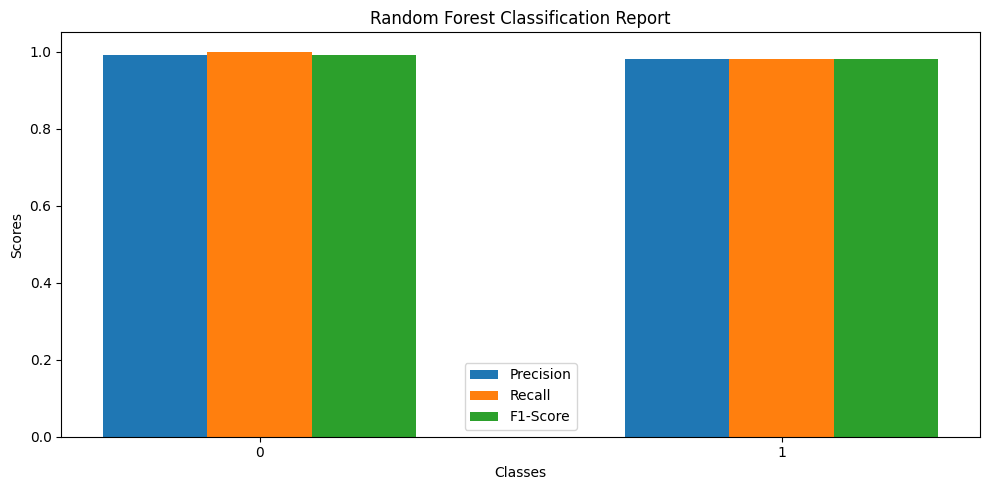

In [16]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5]
}

rf_grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_param_grid, cv = cv, scoring='accuracy')
rf_grid_search_cv.fit(X_train_df, y_train_res)

print("RandomForestClassifier Best Parameters:", rf_grid_search_cv.best_params_)
print("RandomForestClassifier Best Cross-Validation Score:", rf_grid_search_cv.best_score_)

# Predictions on the train data
y_pred_rf_train = rf_grid_search_cv.predict(X_train_df)

# Print the classification report for train data
print("\nRandomForestClassifier Classification Report on Train Data:")
print(classification_report(y_train_res, y_pred_rf_train))

y_pred_rf = rf_grid_search_cv.predict(X_test_df)
print("\nRandomForestClassifier Classification Report on Test data:")
cls_report = classification_report(y_test, y_pred_rf)
print(cls_report)
plot_classification_report(cls_report, 'Random Forest Classification Report')

# Task 5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

GradientBoostingClassifier Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
GradientBoostingClassifier Best Cross-Validation Score: 0.9904834797208555
\GradientBoostingClassifier Classification Report on Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284

\GradientBoostingClassifier Classification Report on Test data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



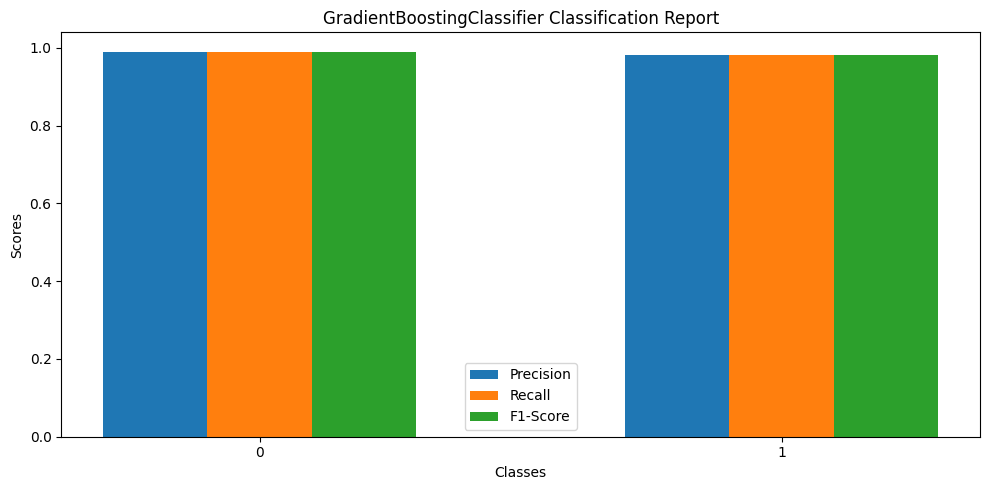

In [45]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 20]
}

gb_grid_search_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gb_param_grid, cv = cv, scoring='accuracy')
gb_grid_search_cv.fit(X_train_df, y_train_res)

print("GradientBoostingClassifier Best Parameters:", gb_grid_search_cv.best_params_)
print("GradientBoostingClassifier Best Cross-Validation Score:", gb_grid_search_cv.best_score_)


# Predictions on the train data
y_pred_gb_train = gb_grid_search_cv.predict(X_train_df)

# Print the classification report for train data
print("\GradientBoostingClassifier Classification Report on Train Data:")
print(classification_report(y_train_res, y_pred_gb_train))

y_pred_gb = gb_grid_search_cv.predict(X_test_df)
print("\GradientBoostingClassifier Classification Report on Test data:")
cls_report = classification_report(y_test, y_pred_gb)
print(cls_report)
plot_classification_report(cls_report, 'GradientBoostingClassifier Classification Report')

# Task 6: Identify the best model and justify the evaluation metrics used.

## 6.1 Find the ROC/AUC for each model and plot the ROC curve

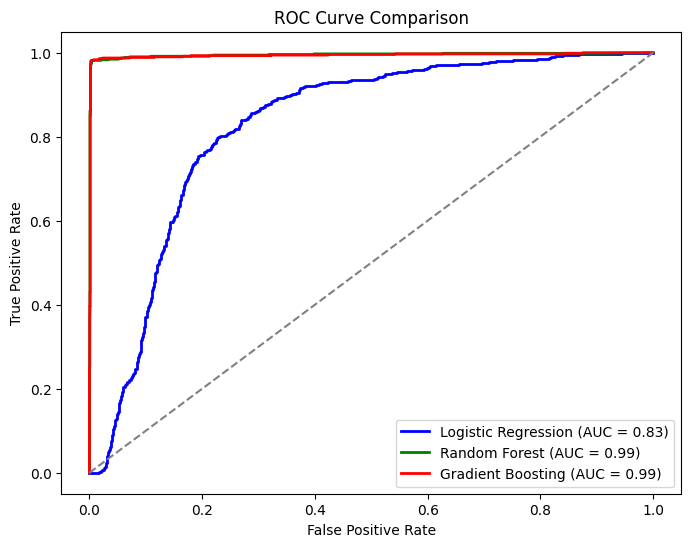

In [28]:
# Get the class 1 probabilities from each model
y_prob_lr = lr_grid_search_cv.predict_proba(X_test_df)[:, 1]  # Logistic Regression
y_prob_rf = rf_grid_search_cv.predict_proba(X_test_df)[:, 1]  # Random Forest
y_prob_gb = gb_grid_search_cv.predict_proba(X_test_df)[:, 1]  # Gradient Boosting

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize= (8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, color='red', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))

# Plot a diagonal line (Random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


## 6.2 Find the confusion matrix for each of the models.

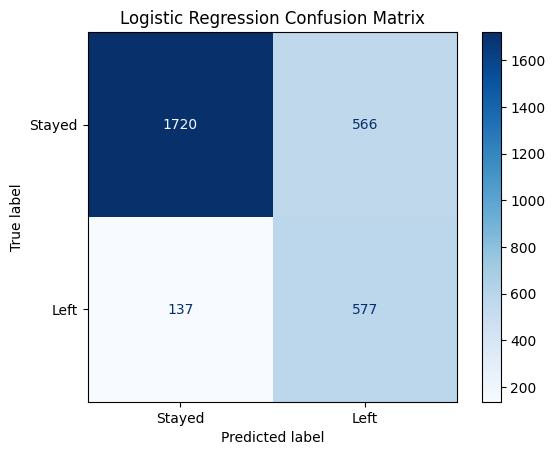

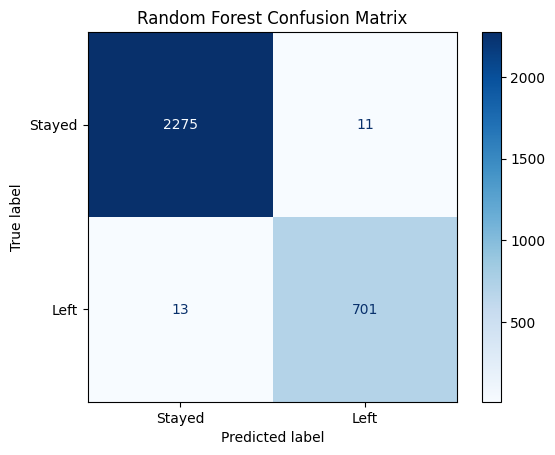

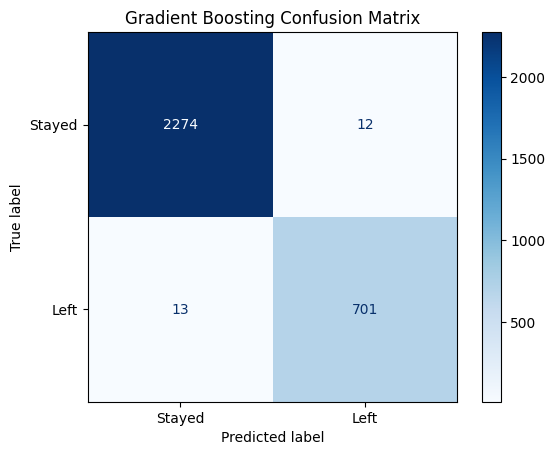

In [46]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Stayed", "Left"])
disp_lr.plot(cmap="Blues", values_format="d")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Stayed", "Left"])
disp_rf.plot(cmap="Blues", values_format="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=["Stayed", "Left"])
disp_gb.plot(cmap="Blues", values_format="d")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


## 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision?

Precision answers, out of all positive predictions ("left" == 1), how many were actually left. And recall answers out of all employee turnover(actual 'left' employees), how much model identified correctly. Precision is about the accuracy of positive predictions and Recall is about the coverage of actual positives. The primary goal here is to predict the employee turnover is typically to identify employees at risk of leaving so the company can take preventive actions. So here the recall should be prioritized, as it ensures the model identifies most employees who will leave, allowing the company to take preventive action. The cost of missing a leaver (FN) is higher than incorrectly predicting someone will leave (FP). At the same time, it's ideal to monitor the precision as well, because improving recal can decrease the precision. The F1-score can guide the balance, but recall should be the primary focus given the business context.

# Task 7: Suggest various retention strategies for targeted employees.

## 7.1: Using the best model, predict the probability of employee turnover in the test data.

The Random Forest model seems to be the best model with highest recall.

In [34]:
y_test.value_counts()

,count
left,
0,2286
1,714


In [37]:
# Consider only the employees who stayed with the company.
# Reset index for both X_test_df and y_test to make sure they are aligned
X_test_df_reset = X_test_df.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# filter the employees who stayed (y_test == 0)
X_test_stayed = X_test_df_reset[y_test_reset == 0].copy()

print(f"Number of employees who are currently with the company : {len(X_test_stayed)}")



Number of employees who are currently with the company : 2286


## 7.2 Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

*   Safe Zone (Green) (Score < 20%)
*   Low-Risk Zone (Yellow) (20% < Score < 60%)
*   Medium-Risk Zone (Orange) (60% < Score < 90%)
*   High-Risk Zone (Red) (Score > 90%).



In [39]:
def categorize_employee(prob):
    if prob < 0.20:
        return 'Safe Zone (Green)'  # Low probability of leaving
    elif 0.20 <= prob < 0.60:
        return 'Low-Risk Zone (Yellow)'  # Moderate probability of leaving
    elif 0.60 <= prob < 0.90:
        return 'Medium-Risk Zone (Orange)'  # High probability of leaving
    else:
        return 'High-Risk Zone (Red)'  # Very high probability of leaving


y_probs = rf_grid_search_cv.predict_proba(X_test_stayed)[:, 1] # Predict with Random Forest Model

# To get the original data back (inverse scaling)
X_test_original_stayed = scaler.inverse_transform(X_test_stayed)

# Convert back to DataFrame
X_test_original_df = pd.DataFrame(X_test_original_stayed, columns=X_test_stayed.columns)

X_test_original_df["probability_of_leaving"] = y_probs

X_test_original_df['zone'] = X_test_original_df['probability_of_leaving'].apply(categorize_employee)

print("Employee probability of leaving info")
print(X_test_original_df['probability_of_leaving'].describe())

print("\n\nEmployee turnover probability zone distribution")
print(X_test_original_df['zone'].value_counts())

Employee probability of leaving info
count    2286.000000
mean        0.036775
std         0.078047
min         0.000000
25%         0.000543
50%         0.010000
75%         0.036590
max         1.000000
Name: probability_of_leaving, dtype: float64


Employee turnover probability zone distribution
zone
Safe Zone (Green)            2202
Low-Risk Zone (Yellow)         77
High-Risk Zone (Red)            4
Medium-Risk Zone (Orange)       3
Name: count, dtype: int64


In [41]:
X_test_original_df[X_test_original_df['zone'] == 'High-Risk Zone (Red)'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,probability_of_leaving,zone
656,0.39,0.57,2.0,132.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.000000,High-Risk Zone (Red)
849,0.85,0.96,4.0,240.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.946237,High-Risk Zone (Red)
1076,0.42,0.50,2.0,151.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.999988,High-Risk Zone (Red)
1103,0.82,0.87,5.0,273.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.952206,High-Risk Zone (Red)


In [42]:
X_test_original_df[X_test_original_df['zone'] == 'Medium-Risk Zone (Orange)'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,probability_of_leaving,zone
32,0.70,0.84,6.0,225.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.601040,Medium-Risk Zone (Orange)
1048,0.84,0.84,6.0,261.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.621376,Medium-Risk Zone (Orange)
1360,0.42,0.58,2.0,140.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.625000,Medium-Risk Zone (Orange)


In [43]:
X_test_original_df[X_test_original_df['zone'] == 'Low-Risk Zone (Yellow)'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,probability_of_leaving,zone
1,0.76,0.93,3.0,271.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.405000,Low-Risk Zone (Yellow)
64,0.21,0.43,2.0,249.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.250000,Low-Risk Zone (Yellow)
91,0.85,0.62,2.0,280.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.213125,Low-Risk Zone (Yellow)
92,0.21,0.94,3.0,287.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.236894,Low-Risk Zone (Yellow)
135,0.80,0.96,3.0,257.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.241220,Low-Risk Zone (Yellow)


In [44]:
X_test_original_df[X_test_original_df['zone'] == 'Safe Zone (Green)'].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium,probability_of_leaving,zone
0,0.98,0.77,3.0,191.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000022,Safe Zone (Green)
2,0.70,0.93,3.0,185.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.032085,Safe Zone (Green)
3,0.48,0.61,3.0,223.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.005000,Safe Zone (Green)
4,0.57,0.90,3.0,144.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.005511,Safe Zone (Green)
5,0.79,0.82,3.0,98.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.010198,Safe Zone (Green)


## Thoughts on the retention strategies for each zone.


As per the above analysis, the current employees are grouped into below categories.

*   Safe Zone (Green)            2202
*   Low-Risk Zone (Yellow)         77
*   High-Risk Zone (Red)            4
*   Medium-Risk Zone (Orange)       3

Though most of the employees (2202) are in the safe zone, there is still a few number of employees which are in High risk and medium zone. Compared to Safe Zone employees, the salary on these groups seems low, this low salary could be a potential factor for employee leaving the firm. The number of projects and average monthly hours also seems quite high compared to safe zone employees.  By addressing the unique needs of each zone, particularly focusing on salary adjustments, workload management, company may mitigate turnover and improve employee retention.

